# KNN Assignment
---

## The Sonar Data 

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.


The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine). 

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

## Q1: Imports and Data Reading

In [12]:
# Imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [13]:
# Read data

df = pd.read_csv('../Data/sonar.csv')

df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Q2: EDA

1. Create a heatmap of the correlation between the difference frequency responses
2. What are the top 5 correlated frequencies with the target label?

In [14]:
# Convert labels to numeric

df['Label'] = df['Label'].map({'M': 1, 'R': 0})

In [15]:
# Compute correlation matrix

correlation_matrix = df.drop('Label',axis=1).corr()

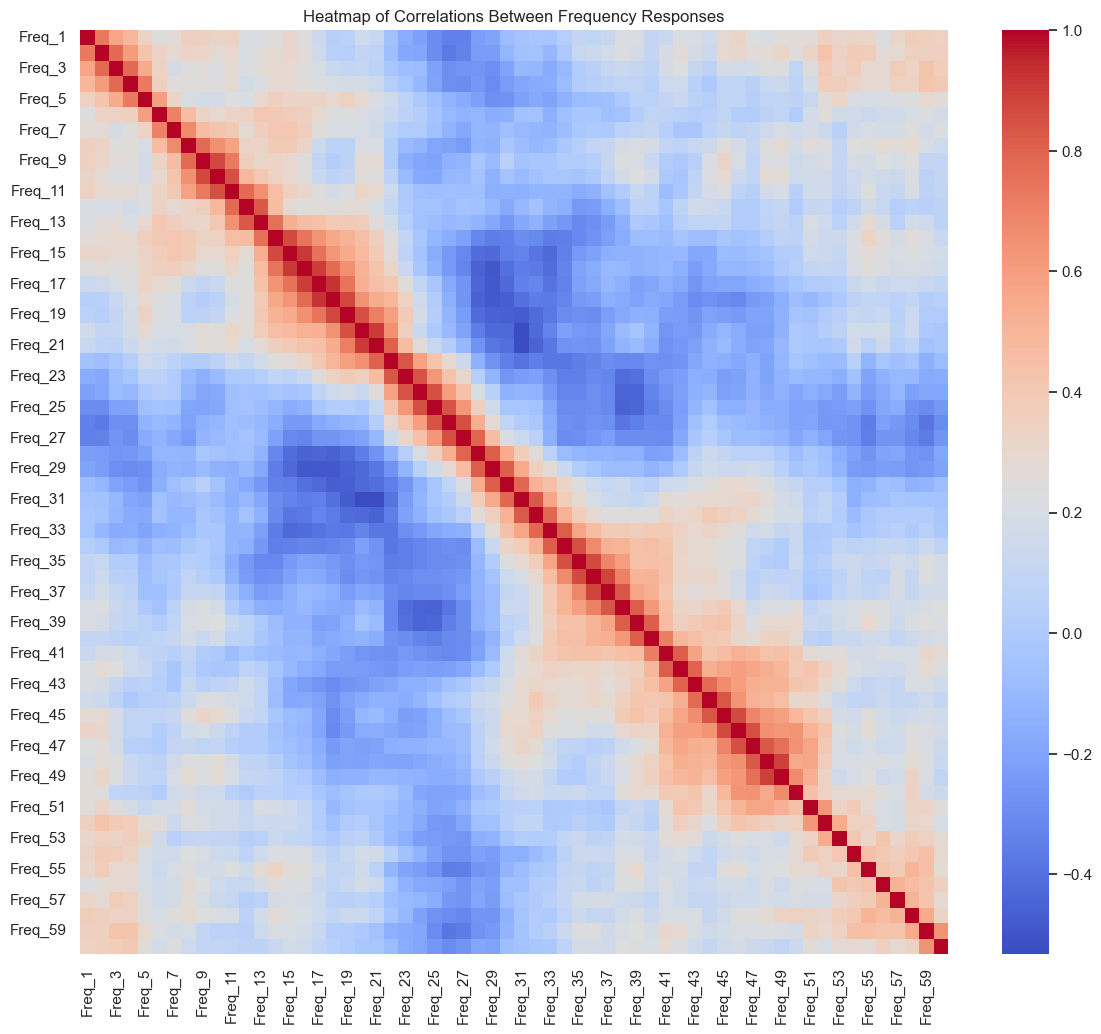

In [16]:
# Create heatmap of correlations

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt='.2f')
plt.title('Heatmap of Correlations Between Frequency Responses')
plt.show()

In [17]:
# Correlations between frequencies and the target label

correlations_with_label = df.drop('Label', axis=1).apply(lambda x: x.corr(df['Label']))

# # Top 5 correlated frequencies

top_5_correlated = correlations_with_label.abs().sort_values(ascending=False).head(5)
print("Top 5 Correlated Frequencies with Target Label:")
print(top_5_correlated)

Top 5 Correlated Frequencies with Target Label:
Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
dtype: float64


## Q3: Prepare Data for Analysis

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model. 

1. Split the data into features and labels.
2. Split the data into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.

In [18]:
# Split data into features and labels

X = df.drop('Label', axis=1)
y = df['Label']

In [19]:
# Train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Q4: Pipeline

1. Create a PipeLine that contains both a StandardScaler and a KNN model
2. Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters
3. Using the `.cv_results_ dictionary`, see if you can create a plot of the mean test scores per K value

In [20]:
# Create a pipeline with StandardScaler and KNN

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

In [21]:
# Define the parameter grid for KNN

k_values = list(range(1,21))
param_grid = {'knn__n_neighbors': k_values}

In [22]:
# Perform Grid Search
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20]},
             scoring='accuracy')

In [23]:
# Get best parameters

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'knn__n_neighbors': 1}


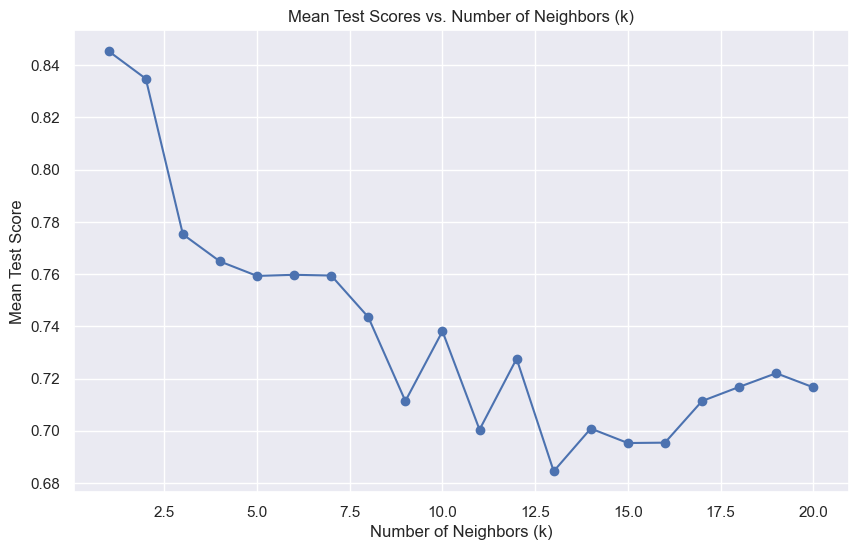

In [24]:
# Get mean test scores from cv_results

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

cv_results = grid_search.cv_results_
mean_test_scores = cv_results['mean_test_score']
k_values = param_grid['knn__n_neighbors']

# Plot mean test scores

plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Test Score')
plt.title('Mean Test Scores vs. Number of Neighbors (k)')
plt.grid(True)
plt.show()

## Q5: Final Model Evaluation

1. Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.

In [25]:
scaler = StandardScaler()
knn1 = KNeighborsClassifier(n_neighbors=1)
operations = [('scaler',scaler),('knn1',knn1)]
pipe = Pipeline(operations)
pipe.fit(X_train,y_train)
pipe_pred = pipe.predict(X_test)

In [26]:
# Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pipe_pred))

[[ 7  1]
 [ 1 12]]


In [27]:
# Classification report
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.92      0.92      0.92        13

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



### Great Job!